In [1]:
import os
os.chdir(os.path.expanduser('~/FFF/'))
import fff
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import pickle as pkl
import umap
matplotlib.rcParams.update({'font.size': 18})

INFO: Using pytorch backend
/tmp/ipykernel_2470790/583152811.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
classifier = False

In [3]:
if classifier:
    df = pd.read_pickle("data/Mnist_Class_data")
else:
    df = pd.read_pickle("data/16Mnist_AE")
# read targets and conditions from dataframe
train_data, train_targets = (
    torch.from_numpy(df["train_x"]),
    torch.from_numpy(df["train_y"]),
)

center = torch.mean(train_targets)
std = torch.std(train_targets)

In [4]:
if classifier:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/classifier/version_4/checkpoints/last.ckpt"
    )
else:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
    #"GTs/28Mnist_AE5/checkpoints/last.ckpt"
    "GTs/16Mnist_AE/checkpoints/last.ckpt"
    )
GT.eval()

torch.Size([60000, 1, 16, 16])
cond_dim:  0
latent_dim:  8
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]


FreeFormInjectiveFlow(
  (models): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (model): Sequential(
        (encoder): Sequential(
          (0): Unflatten(dim=-1, unflattened_size=(1, 16, 16))
          (1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (4): ReLU()
          (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (6): ReLU()
          (7): Flatten(start_dim=-3, end_dim=-1)
          (8): Linear(in_features=1024, out_features=8, bias=True)
        )
        (decoder): Sequential(
          (0): Linear(in_features=8, out_features=4096, bias=True)
          (1): Unflatten(dim=-1, unflattened_size=(256, 4, 4))
          (2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (3): ReLU()
          (4): ConvTranspose2d(128, 1, kernel_size=(3, 3), stride=(2, 2), padding=(

In [10]:
if classifier:
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/class_5new3mask4/version_0/checkpoints/last.ckpt"
    )
else:
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/16aznc_i_lr2/version_0/checkpoints/last.ckpt"
    )

cond_dim:  0
latent_dim:  100
[100, 512, 512, 100]
[100, 512, 512, 100]
[100, 512, 512, 100]
[100, 512, 512, 100]
[100, 512, 512, 100]
[100, 512, 512, 100]
load models checkpoint
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
[58, 256, 100]
Teacher is Autoencoder
torch.Size([60000, 1, 16, 16])
cond_dim:  0
latent_dim:  8
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]
[8, 512, 512, 8]


In [11]:
model = model.eval()

encoding...
torch.Size([10000, 100])
reconstructing...
sampling...
[1.14263834e-07 1.92219204e-07 1.95335971e-07 1.24172374e-07
 4.80548010e-08 1.11161071e-07 1.28496055e-07 1.70681730e-07
 1.37771295e-07 1.16037860e-07]
torch.Size([10000, 100])
main detail standard deviation:  tensor(1.4345)
2nd detail standard deviation:  tensor(1.5018)


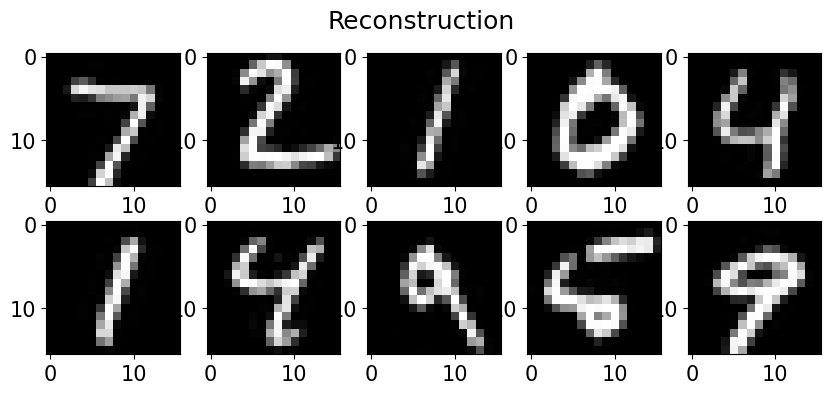

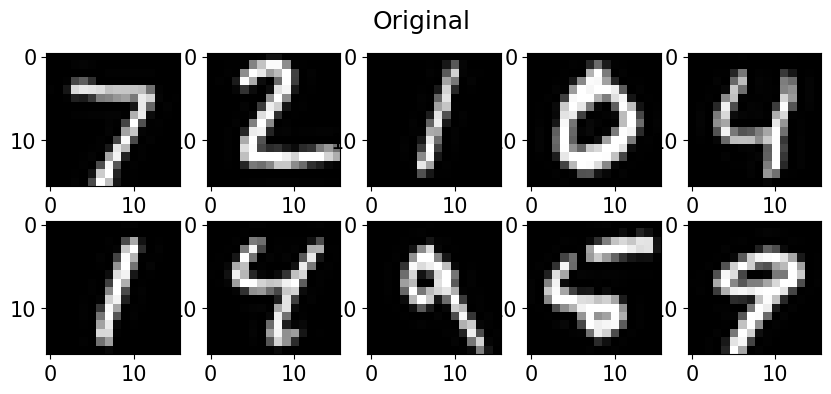

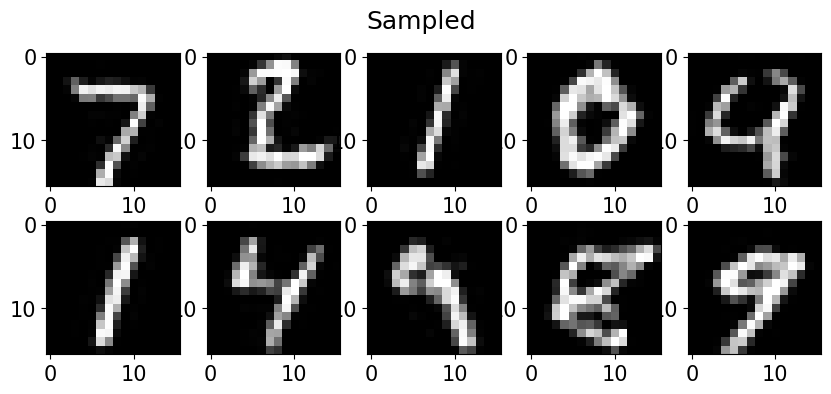

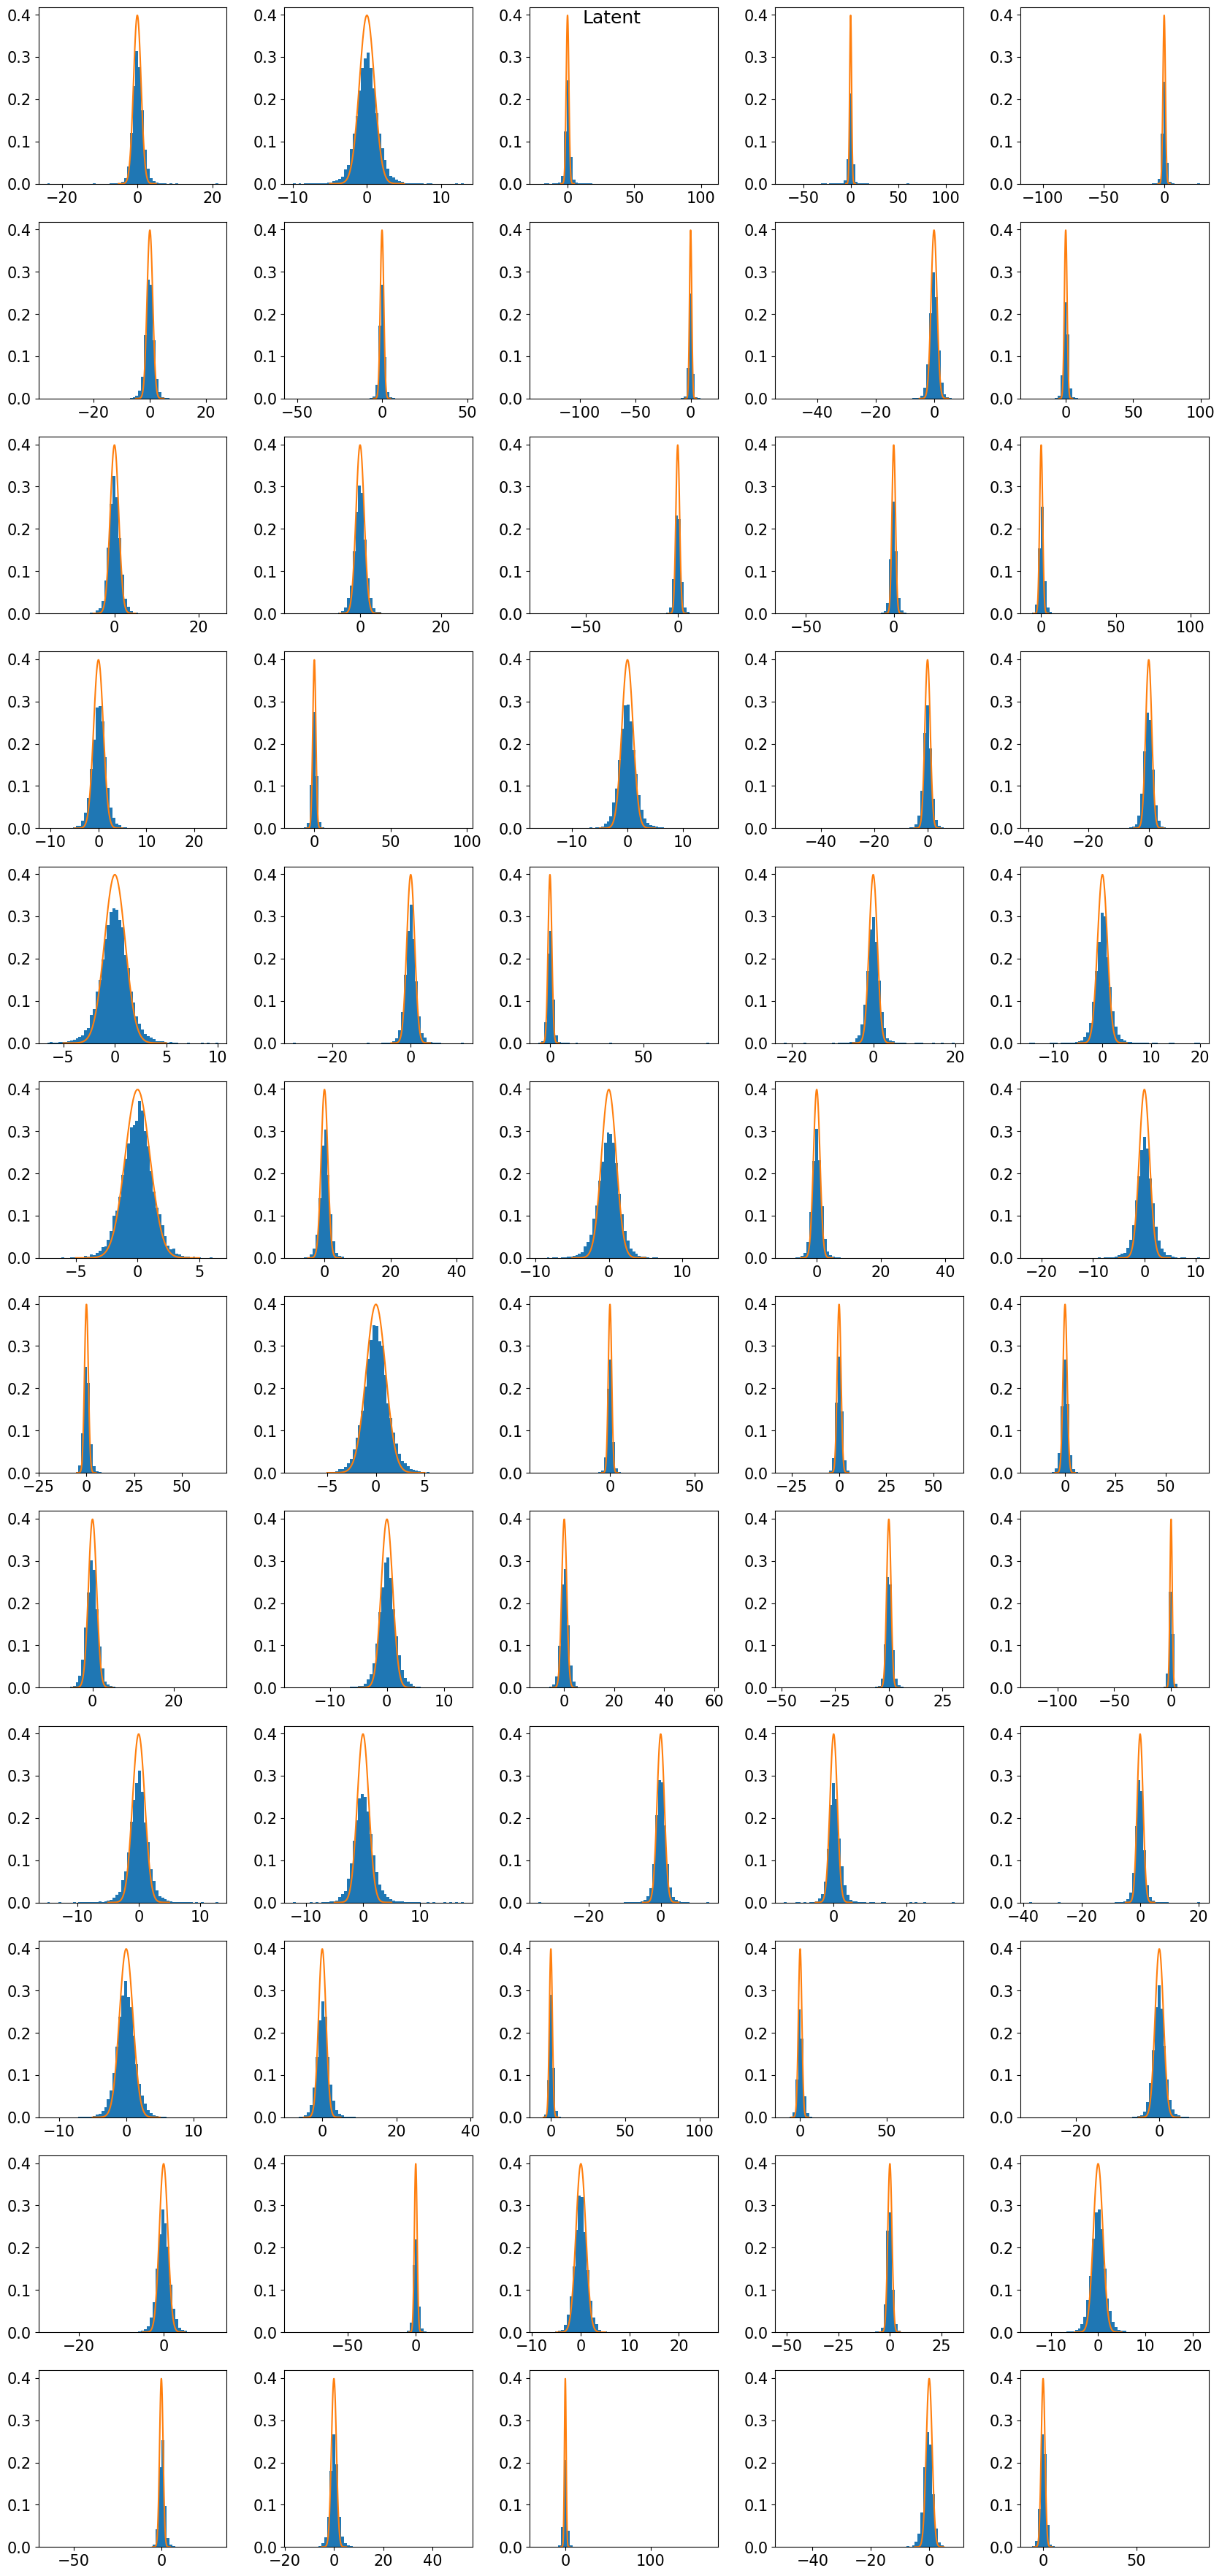

In [35]:
save = False
plot_dir = "ae5/533_mask"
data = plot_mnist(model)
z_test = data["test_z"]
std_z0 = torch.std(z_test[:,0])
print("main detail standard deviation: ", std_z0)
print("2nd detail standard deviation: ", torch.std(z_test[:,1]))
latent_dim = data["test_c"].shape[1]

tensor([2.6215, 3.7237, 1.3848, 3.3478, 3.8534, 3.0552])
tensor([3.3489, 4.0966, 4.7792, 3.2341, 4.3130, 3.2711])


'\naccident = torch.stack(accident)\nfig, axes = plt.subplots(nrows=3, ncols=6, figsize=(14, 9))\ndist = torch.sqrt(torch.sum((accident[1:]-accident[:-1])**2,-1))\nfor i in range(3):\n    for j in range(6):\n        axes[i][j].imshow(accident[i*6+j].cpu().reshape(16,16), cmap=\'gray\')\n        axes[i][j].set_title(str(nums[i*6+j]) + " " + str(np.round(dist[i*6+j].numpy(),2)))\nplt.suptitle(r"accidental finding")\n'

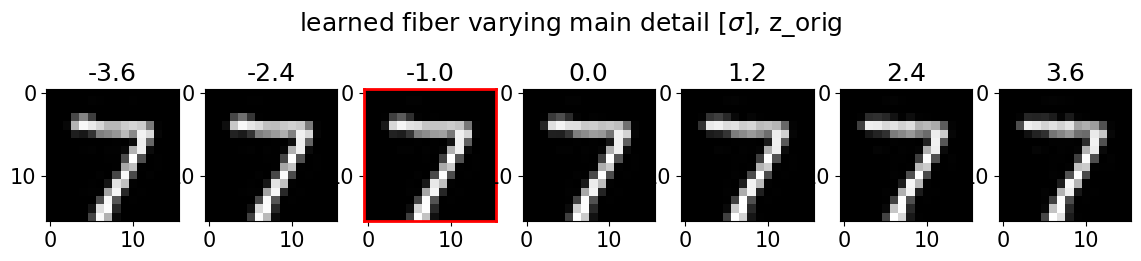

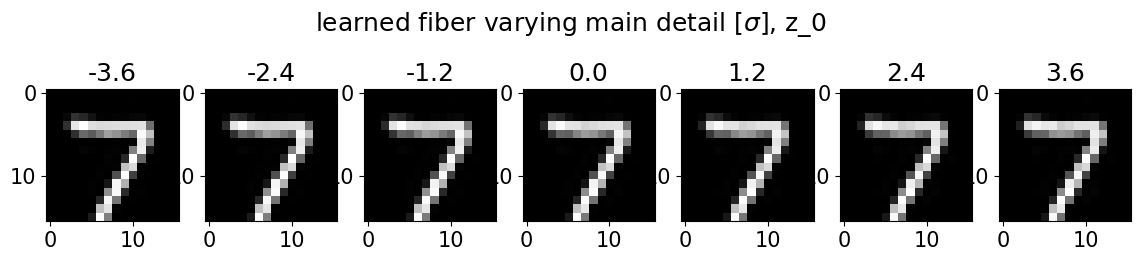

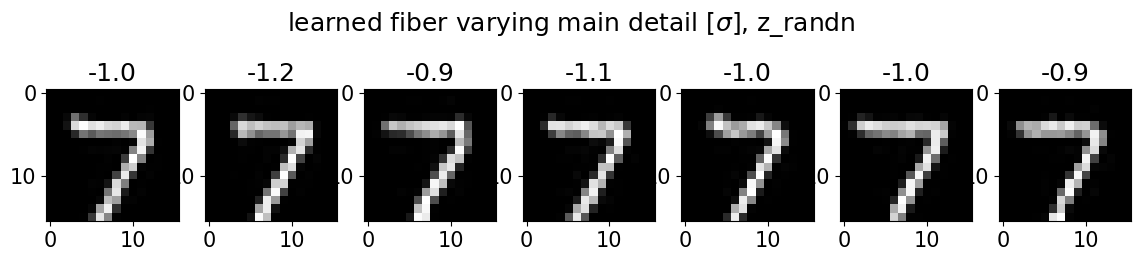

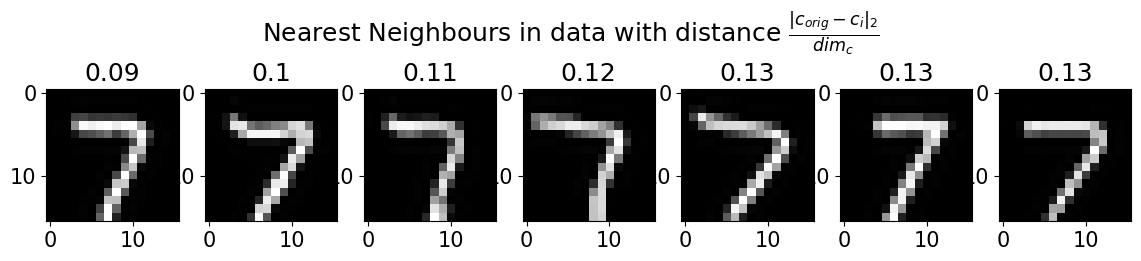

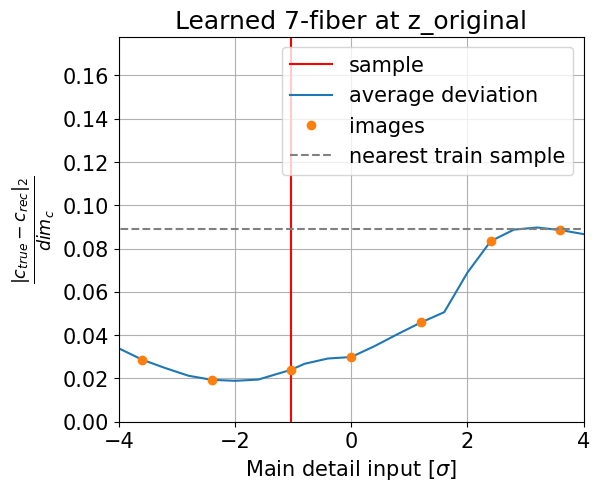

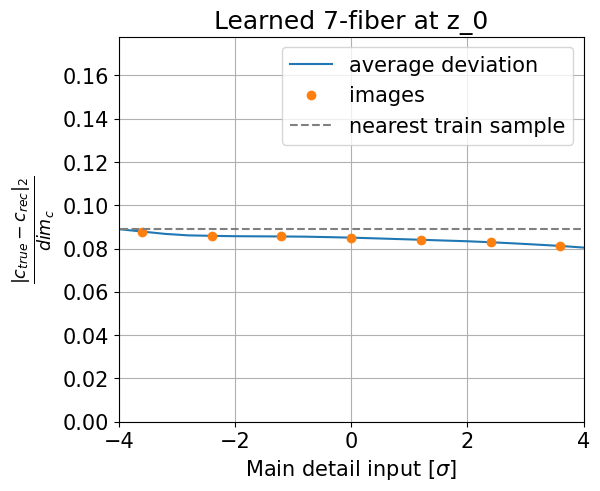

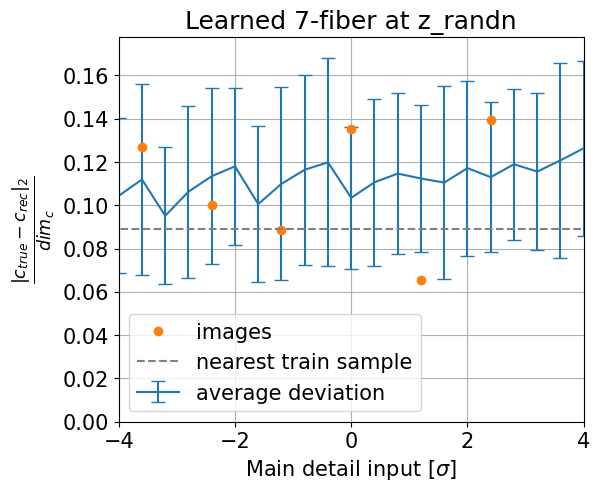

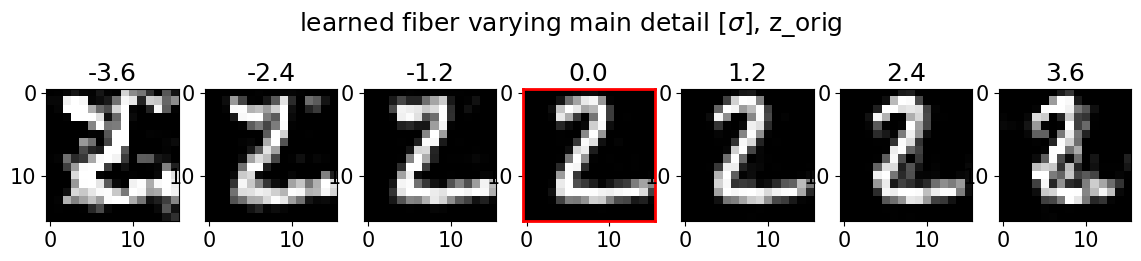

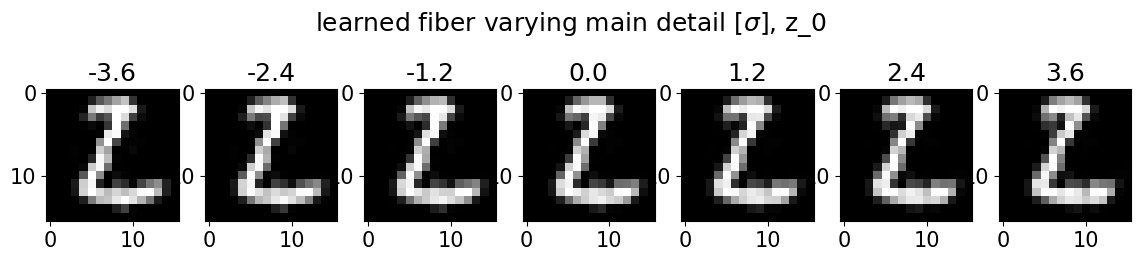

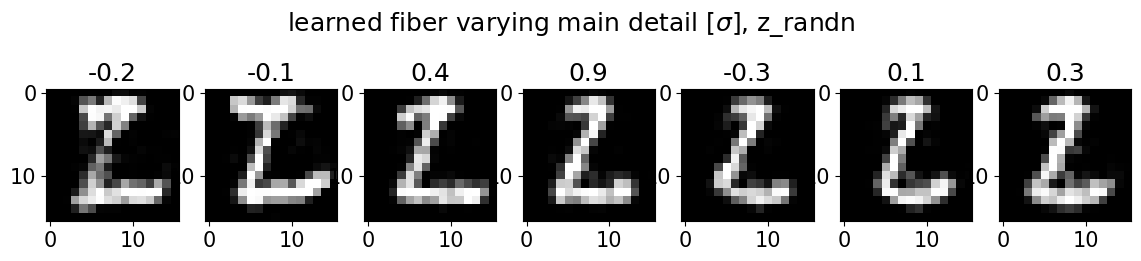

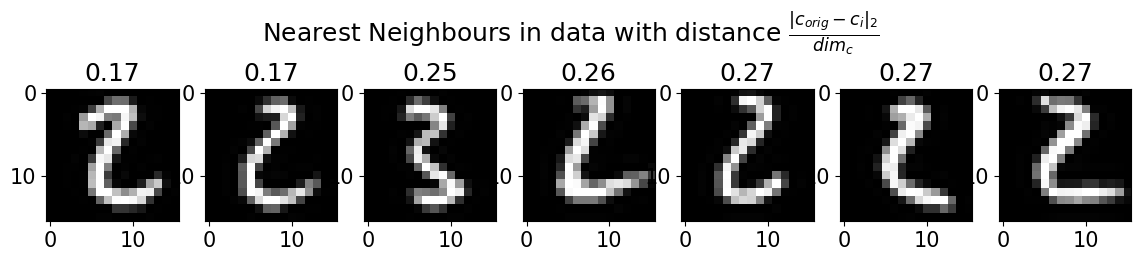

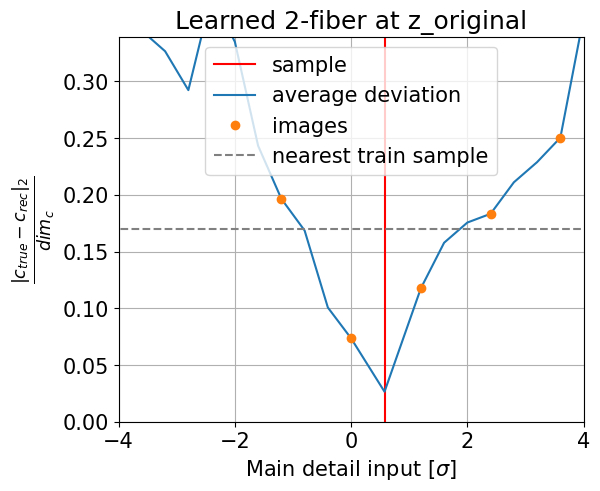

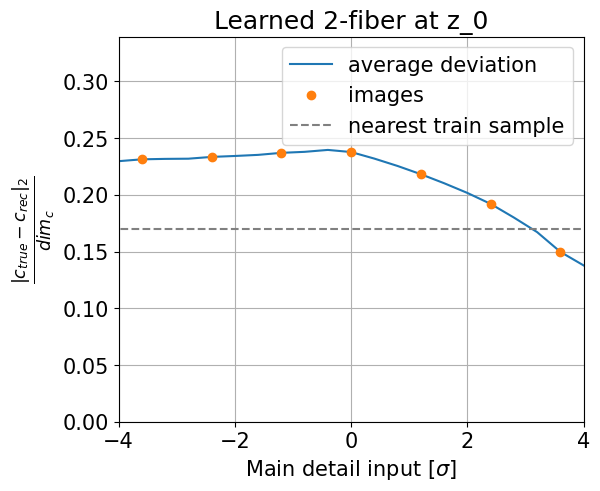

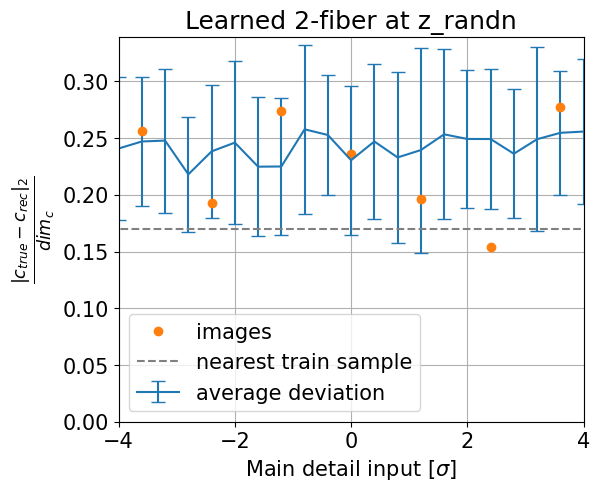

In [70]:
zrange = 4*std_z0
matplotlib.rcParams.update({'font.size': 15})
nums = [7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4,0,0,0,0,0,0,0,0,0,0,0,0]
z_name = ["z_original", "z_0", "z_randn"]

accident = []
for j in range(2):
    xs, c_sample, z0_range, NN, z0_sample, new_details_norm = plot_details(model, data, j, zrange)
    #accident.append(keep)
    for i, xi in enumerate(xs):
        if classifier == False:
            conditioned = GT.apply_conditions((xi,))
            c = conditioned.condition
            x = conditioned.x0
            check_fiber = (GT.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
        else:
            conditioned = GT.apply_conditions((xi,c_sample))
            x = conditioned.x0
            c = torch.empty((x.shape[0], 0), device=x.device, dtype=x.dtype)
            check_fiber = (Features.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
        
        #print(torch.max(check_fiber-c_sample, dim=1)[0])
        plt.figure(figsize=[6,5])
        if i == 0:
            delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample)**2, dim=1)).detach().numpy()/latent_dim
            delta_details = z0_range/std_z0
            plt.axvline(x=z0_sample/std_z0, ymin=0, ymax=2,color='red', label='sample')
            plt.plot(delta_details,delta_coarse, label="average deviation")
        elif i==1:
            delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample)**2, dim=1)).detach().numpy()/latent_dim
            delta_details = np.linspace(-zrange,zrange,z0_range.shape[0])/std_z0
            plt.plot(delta_details,delta_coarse, label="average deviation")
        else:
            delta_coarse = (torch.sqrt(torch.sum((check_fiber-c_sample.repeat(40,1))**2, dim=1))/latent_dim).detach()
            delta_c_std, delta_c = torch.std_mean(delta_coarse.reshape(40,-1), dim=0)
            delta_c = delta_c.detach().numpy()
            delta_details = np.linspace(-zrange,zrange,z0_range.shape[0])/std_z0
            plt.errorbar(delta_details,delta_c,yerr=delta_c_std.detach(), label="average deviation",capsize=5)
        plt.plot(delta_details[1::21//7],delta_coarse[1:21:21//7], marker='o', label="images", linestyle='')
            
        #plotting...
        plt.axhline(y=NN, xmin=-10, xmax=10, color='gray', linestyle="--", label='nearest train sample')
        plt.title(f"Learned {nums[j]}-fiber at {z_name[i]}")
        plt.ylabel(r"$\frac{|c_{true}-c_{rec}|_2}{dim_c}$", fontsize=18)
        plt.legend()
        plt.xlabel(r"Main detail input [$\sigma$]")
        plt.ylim((0,2*NN))
        plt.xlim((-zrange/std_z0,zrange/std_z0))
        plt.grid()
        if save:
            plt.savefig(f"plots/{plot_dir}/fiber0/{nums[j]}deviation_{z_name[i]}.png", bbox_inches='tight')
"""
accident = torch.stack(accident)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(14, 9))
dist = torch.sqrt(torch.sum((accident[1:]-accident[:-1])**2,-1))
for i in range(3):
    for j in range(6):
        axes[i][j].imshow(accident[i*6+j].cpu().reshape(16,16), cmap='gray')
        axes[i][j].set_title(str(nums[i*6+j]) + " " + str(np.round(dist[i*6+j].numpy(),2)))
plt.suptitle(r"accidental finding")
"""

distance: x_original - x_fiber:  2.872495174407959
tensor(3.3149, grad_fn=<MaxBackward1>)
loss: 0.23582899570465088
loss: 0.22504782676696777
loss: 0.21537034213542938
loss: 0.20603589713573456
loss: 0.1974099725484848
loss: 0.18895037472248077
loss: 0.1815231442451477
loss: 0.17561258375644684
loss: 0.17142142355442047
loss: 0.16793999075889587
loss: 0.16472646594047546
loss: 0.1618683934211731
loss: 0.15901778638362885
loss: 0.15651248395442963
loss: 0.15374967455863953
loss: 0.15168540179729462
loss: 0.14988379180431366
loss: 0.148203507065773
loss: 0.1465984731912613
loss: 0.14517603814601898
loss: 0.14386877417564392
loss: 0.14260540902614594
loss: 0.14157767593860626
loss: 0.14057905972003937
loss: 0.13961263000965118
loss: 0.13870938122272491
loss: 0.13788063824176788
loss: 0.13718949258327484
loss: 0.13642969727516174
loss: 0.13581718504428864
loss: 0.13515006005764008
loss: 0.13450732827186584
loss: 0.13386209309101105
loss: 0.1332312971353531
loss: 0.13263626396656036
loss: 0

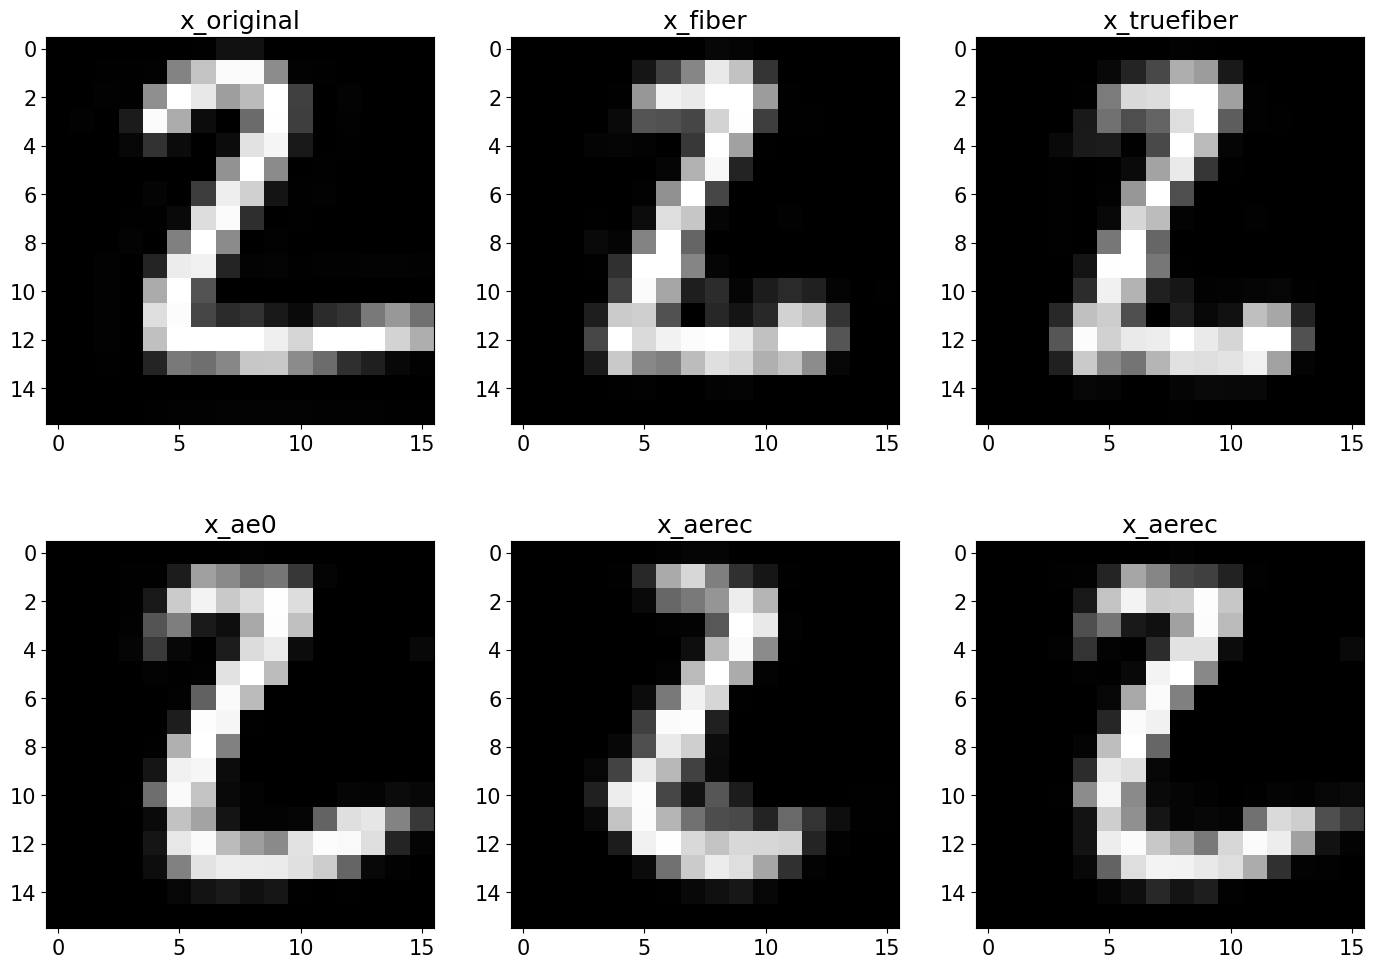

In [102]:
# which kind of samples?
fiber = 2
x_orig = data["test_samples"][1]
#x_rec = torch.unsqueeze(data["test_samples"][0].clone(),dim=0)
x_rec = torch.unsqueeze(xs[fiber][10].clone(),dim=0)
z_rec = torch.unsqueeze(new_details_norm[10],dim=0)

constraint = torch.sqrt(torch.sum(((x_orig - x_rec[0])**2), dim=-1))
print("distance: x_original - x_fiber: ", constraint.item())
c0 = torch.unsqueeze(c_sample[0].clone(),dim=0)

conditioned = GT.apply_conditions((x_rec,))
c = conditioned.condition
x = conditioned.x0
crec = GT.encode(x.to(GT.device), c.to(GT.device)).cpu()

def closs(c0, c_hat, x_hat):
    v = torch.sqrt(torch.sum(((c0 - c_hat)**2), dim=-1))/latent_dim
    distance = torch.sqrt(torch.sum(((x_hat.cpu() - x_rec[0])**2), dim=-1))
    r = torch.max(torch.Tensor([0., (distance - constraint).item()]))
    print("loss:", v.item())
    if r != 0:
        print("penalty:", r.item())
    return v

class ZModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.param = torch.nn.Parameter(z_rec.clone())

zmodel = ZModel()
optimizer = torch.optim.SGD(zmodel.parameters(), lr=0.4)
print(torch.max(torch.abs(zmodel.param)))

c_empty = torch.empty((0,), device=model.device, dtype=x.dtype)
for i in range(100):
    x_model = model.decode(zmodel.param.to(model.device), c_empty)
    conditioned = GT.apply_conditions((x_model,))
    c = conditioned.condition
    x = conditioned.x0
    chat = (GT.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
    loss = closs(c0, chat, x_model)
    loss.backward()
    optimizer.step()
    # check, if image gets further apart than 
    check = torch.mean(torch.sqrt(torch.sum(((x_orig - x_model.cpu())**2), dim=-1)))
    #if check > constraint:
    #    print("too far:")
    #    print(check.item())
    optimizer.zero_grad()

print(torch.max(torch.abs(zmodel.param)))
x_hat = x_model

c0 = c0 * std + center
x_ae0 = GT.decode(c0.to(GT.device), c.to(GT.device)).cpu()

x_aerec = GT.decode(crec.to(GT.device), c.to(GT.device)).cpu()

chat = chat * std + center
x_aehat = GT.decode(chat.to(GT.device), c.to(GT.device)).cpu()

x_plot = [[x_orig, x_ae0], [x_rec, x_aerec], [x_hat, x_aehat]]
name = [["x_original", "x_ae0"], ["x_fiber","x_aerec"], ["x_truefiber", "x_aerec"]]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 12))
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(x_plot[j][i].detach().cpu().reshape(16, 16), cmap='gray')
        axes[i,j].set_title(name[j][i])
#plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_0")
plt.show()

tensor(1.3123)


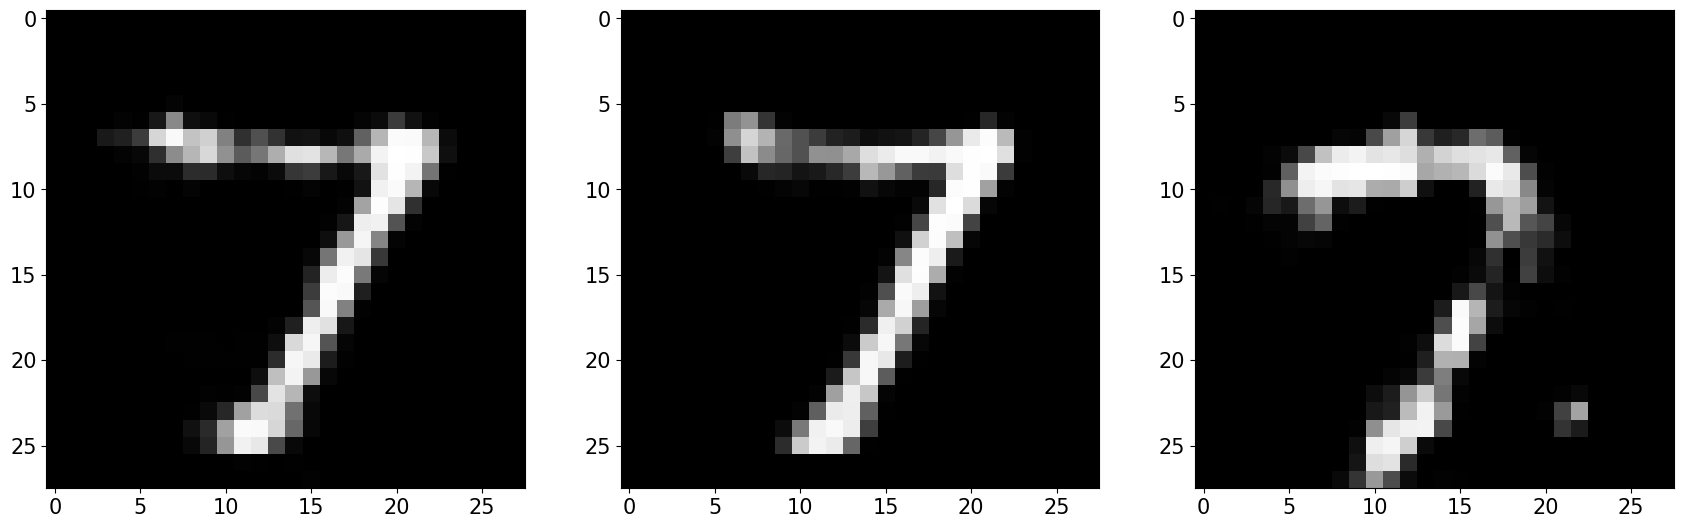

In [53]:
device = model.device


c0 = torch.unsqueeze(c_sample[0].to(device), dim=0)

details_sampled = torch.unsqueeze(new_details_norm[-1],dim=0)
x_fiber = model.decode(details_sampled.to(device), c0).detach().cpu()

x_hat = torch.unsqueeze(x_hat, dim=0)
details_true = model.encode(x_hat.to(device), c0).detach().cpu()
x_truefiber = model.decode(details_true.to(device), c0).detach().cpu()

details_diff = details_sampled - details_true
print(torch.max(details_diff))
x_diff = model.decode(details_diff.to(device), c0).detach().cpu()

x_plot = [x_fiber, x_truefiber, x_diff]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8))
for j in range(3):
    axes[j].imshow(x_plot[j].detach().cpu().reshape(28, 28), cmap='gray')

distance: x_original - x_fiber:  2.635850429534912
loss: 0.2313012331724167
too far:
2.6390180587768555
loss: 0.16760319471359253
too far:
2.6426432132720947
loss: 0.13243038952350616
too far:
2.6421778202056885
loss: 0.11772152781486511
too far:
2.6458942890167236
loss: 0.11280408501625061
too far:
2.6405282020568848
loss: 0.129800483584404
too far:
2.6541523933410645
loss: 0.11249016970396042
too far:
2.6467418670654297
loss: 0.14936329424381256
too far:
2.6595470905303955
loss: 0.09335382282733917
too far:
2.668159246444702
loss: 0.081293486058712
too far:
2.667510986328125
loss: 0.07606355100870132
too far:
2.678323984146118
loss: 0.06978737562894821
too far:
2.671755313873291
loss: 0.08150643110275269
too far:
2.684630870819092
loss: 0.058768972754478455
too far:
2.675736427307129
loss: 0.06727670133113861
too far:
2.690072774887085
loss: 0.05631308630108833
too far:
2.6801931858062744
loss: 0.04798353090882301
too far:
2.6941378116607666
loss: 0.05083188787102699
too far:
2.68794

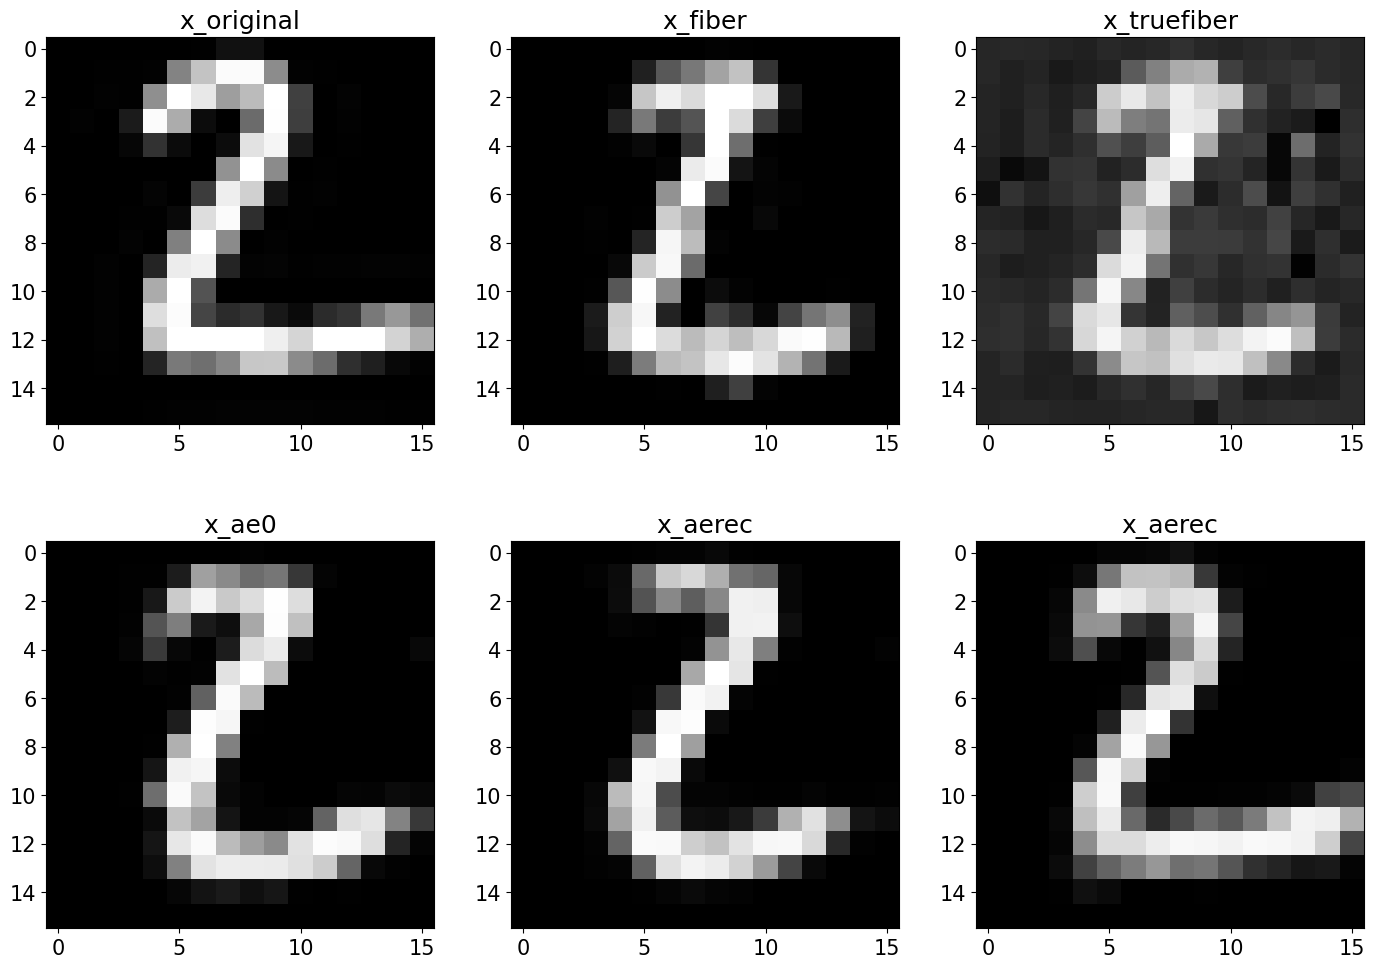

In [94]:
# which kind of samples?
fiber = 1
x_orig = data["test_samples"][1]
#x_rec = torch.unsqueeze(data["test_samples"][0].clone(),dim=0)
x_rec = torch.unsqueeze(xs[fiber][1].clone(),dim=0)
constraint = torch.sqrt(torch.sum(((x_orig - x_rec[0])**2), dim=-1))
print("distance: x_original - x_fiber: ", constraint.item())
c0 = torch.unsqueeze(c_sample[0].clone(),dim=0)

conditioned = GT.apply_conditions((x_rec,))
c = conditioned.condition
x = conditioned.x0
crec = GT.encode(x.to(GT.device), c.to(GT.device)).cpu()

def closs(c0, c_hat, x_hat):
    v = torch.sqrt(torch.sum(((c0 - c_hat)**2), dim=-1))/latent_dim
    distance = torch.sqrt(torch.sum(((xmodel.param - x_rec[0])**2), dim=-1))
    r = torch.max(torch.Tensor([0., (distance - constraint).item()]))
    print("loss:", v.item())
    if r != 0:
        print("penalty:", r.item())
    return v + r

class XModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.param = torch.nn.Parameter(x_rec.clone())

xmodel = XModel()
optimizer = torch.optim.SGD(xmodel.parameters(), lr=0.1)

for i in range(30):
    conditioned = GT.apply_conditions((xmodel.param,))
    c = conditioned.condition
    x = conditioned.x0
    chat = (GT.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
    loss = closs(c0, chat, xmodel.param)
    loss.backward()
    optimizer.step()
    # check, if image gets further apart than 
    check = torch.mean(torch.sqrt(torch.sum(((x_orig - xmodel.param)**2), dim=-1)))
    if check > constraint:
        print("too far:")
        print(check.item())
    optimizer.zero_grad()


x_hat = xmodel.param

c0 = c0 * std + center
x_ae0 = GT.decode(c0.to(GT.device), c.to(GT.device)).cpu()

x_aerec = GT.decode(crec.to(GT.device), c.to(GT.device)).cpu()

chat = chat * std + center
x_aehat = GT.decode(chat.to(GT.device), c.to(GT.device)).cpu()

x_plot = [[x_orig, x_ae0], [x_rec, x_aerec], [x_hat, x_aehat]]
name = [["x_original", "x_ae0"], ["x_fiber","x_aerec"], ["x_truefiber", "x_aerec"]]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 12))
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(x_plot[j][i].detach().cpu().reshape(16, 16), cmap='gray')
        axes[i,j].set_title(name[j][i])
#plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_0")
plt.show()

In [67]:
def plot_details(model2plot, data, sample, zrange):
    nums = [7,2,1,0,4]
    device = model2plot.device
    
    pos_min, pos_max = -zrange, zrange
    c = data["test_c"]
    z = data["test_z"]
    train_c = data["train_c"]
    train_samples = data["train_samples"]
    N = 21
    n = 7
    ddim = 100

    #calculate two walks along main detail dimension
    z0_range = torch.linspace(pos_min, pos_max, N)
    z0_range1 = z0_range.clone()
    z0_range1[torch.argmin((z0_range-z[sample][0])**2)] = z[sample][0]
    z0_sample = z[sample][0].numpy()
    
    z_list = []
    for i in range(N):
        z_new = z[sample].clone()
        z_new[0] = z0_range1[i]
        z_list.append(z_new)
    new_details1 = torch.stack(z_list)

    z_list = []
    for i in range(N):
        z_new = torch.zeros(ddim)
        z_new[2] = z0_range[i]
        z_list.append(z_new)
    new_details0 = torch.stack(z_list)
    #new_details0 = torch.zeros(N,53)
    #new_details0 = torch.cat([torch.unsqueeze(z0_range,1), new_details0], dim=1)
    
    new_details_norm = torch.randn(40,N,ddim-1)
    z0_range_norm = torch.unsqueeze(z0_range,0)
    z0_range_norm = z0_range_norm.repeat(40,1)
    new_details_norm = torch.cat([torch.unsqueeze(z0_range_norm,2), new_details_norm], dim=2)
    new_details_norm = torch.reshape(new_details_norm, (40*N,ddim))
    #print(torch.reshape(new_details_norm, (40,N,100))[0,:,0])
    
    #decoding...
    c0 = torch.empty((new_details1.shape[0], 0), device=new_details1.device, dtype=new_details1.dtype)
    c_sample = torch.unsqueeze(c[sample], dim=0)
    c_sample_norm = c_sample.repeat(40*N,1)
    c_sample_norm0 = torch.empty((c_sample_norm.shape[0], 0), device=new_details1.device, dtype=new_details1.dtype)
    c_sample = c_sample.repeat(N,1)
    new_details1 = model2plot.transform_model.decode(new_details1.to(device), c_sample.to(device)).detach().cpu()
    x_details1 = model2plot.decode(new_details1.to(device), c0.to(device)).detach().cpu()
    new_details_norm = model2plot.transform_model.decode(new_details_norm.to(device), c_sample_norm.to(device)).detach().cpu()
    x_details_norm = model2plot.decode(new_details_norm.to(device), c_sample_norm0.to(device)).detach().cpu()
    new_details0 = model2plot.transform_model.decode(new_details0.to(device), c_sample.to(device)).detach().cpu()
    x_details0 = model2plot.decode(new_details0.to(device), c0.to(device)).detach().cpu()
    
    #plotting...
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    del_detail = []
    for i in range(n):
        axes[i].imshow(x_details1[i*N//n+1].detach().cpu().reshape(16, 16), cmap='gray')
        axes[i].set_title((z0_range1[i*N//n+1]/std_z0).numpy().round(1))
        del_detail.append(z0_range1[i*N//n+1])
    del_detail = (np.array(del_detail)-z0_sample)**2
    closest = np.argmin(del_detail)
    for spine in axes[closest].spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_orig")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_zorig.png", bbox_inches='tight')

    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(x_details0[i*N//n+1].detach().cpu().reshape(16, 16), cmap='gray')
        axes[i].set_title((z0_range[i*N//n+1]/std_z0).numpy().round(1))
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_0")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_z0.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(x_details_norm[i*N//n+1].detach().cpu().reshape(16, 16), cmap='gray')
        axes[i].set_title((new_details_norm[i*N//n+1,0]/std_z0).numpy().round(1))
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_randn")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_znew.png", bbox_inches='tight')
    
    verify = c[sample]
    diff = train_c - verify
    squared_diff = torch.sqrt(torch.sum(torch.square(diff), dim =1))
    ind = torch.argsort(squared_diff)[:n]
    #print("squared distance between chosen sample and nearest train samples:", squared_diff[ind]/5)
    similar = train_samples[ind]
    NN = squared_diff[ind[0]].numpy()/latent_dim

    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(similar[i].detach().cpu().reshape(16, 16), cmap='gray')
        axes[i].set_title(np.round(squared_diff[ind[i]].numpy()/latent_dim,2))
    fig.suptitle(r"Nearest Neighbours in data with distance $\frac{|c_{orig}-c_i|_2}{dim_c}$")
    dist = torch.sqrt(torch.sum((similar[:-1]-similar[1:])**2,-1))
    print(dist)
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}NN.png", bbox_inches='tight')
    
    return [x_details1, x_details0, x_details_norm], c_sample, z0_range1, NN, z0_sample, new_details_norm

In [34]:
from fff.evaluate.plots import all_conditions
def plot_mnist(model2plt):
    device = model2plt.device
    
    data = {}
    train_batch = model2plt.train_data[:]
    test_batch = model2plt.test_data[:]

    train_conditioned = model2plt.apply_conditions(train_batch)
    train_samples = train_conditioned.x_noisy
    train_c = train_conditioned.condition
    train_c0 = torch.empty((train_samples.shape[0], 0), device=train_samples.device, dtype=train_samples.dtype)
    
    test_conditioned = model2plt.apply_conditions(test_batch)
    test_c = test_conditioned.condition
    test_samples = test_conditioned.x_noisy
    test_c0 = torch.empty((test_samples.shape[0], 0), device=test_samples.device, dtype=test_samples.dtype)
    
    data["train_samples"] = train_samples
    data["test_samples"] = test_samples
    data["test_c"] = test_c
    data["train_c"] = train_c

    #computing...
    print("encoding...")
    batch_size = model2plt.hparams.batch_size
    test_z = torch.cat([
        model2plt.encode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(test_samples.split(batch_size), test_c0.split(batch_size))
    ])
    print(test_z.shape)
    
    print("reconstructing...")
    reconstruction = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(test_z.split(batch_size), test_c0.split(batch_size))
    ])
   
    print("sampling...") 
    """
    z_sampled = torch.randn_like(test_z)
    x_sampled = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(z_sampled.split(batch_size), test_c.split(batch_size))
    ])
    """
    x_sampled = model2plt.sample((test_z[:100].shape[0],),test_c[:100].to(device))

    #plotting...
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(reconstruction[i*5 +j].detach().cpu().reshape(16, 16), cmap='gray')
    fig.suptitle("Reconstruction")
    if save:
        plt.savefig(f"plots/{plot_dir}/reconstruction.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow((test_samples[i*5 +j]).detach().cpu().reshape(16, 16), cmap='gray')
    fig.suptitle("Original")
    if save:
        plt.savefig(f"plots/{plot_dir}/original.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(x_sampled[i*5 +j].detach().cpu().reshape(16, 16), cmap='gray')
    fig.suptitle("Sampled")
    if save:
        plt.savefig(f"plots/{plot_dir}/sampled.png", bbox_inches='tight')

    #sanity check
    if classifier:
        conditioned = GT.apply_conditions((test_samples[:10],torch.zeros((10,0),device=device)))
        x_san = conditioned.x0
        c_emp = torch.empty((x_san.shape[0], 0), device=x_san.device, dtype=x_san.dtype)
        c_san = (Features.encode(x_san.to(GT.device), c_emp.to(GT.device)).detach().cpu()-center)/std
    else:
        conditioned = GT.apply_conditions((test_samples[:10],))
        c_emp = conditioned.condition
        x_san = conditioned.x0
        c_san = (GT.encode(x_san.to(GT.device), c_emp.to(GT.device)).detach().cpu()-center)/std
    sanity = torch.sqrt(torch.sum((c_san-test_c[:10])**2, dim=1)).detach().numpy()/5
    print(sanity)

    test_z = torch.cat([
        model2plt.transform_model.encode(batch.to(device), c_batch.to(device))[0].detach().cpu()
        for batch, c_batch in zip(test_z.split(batch_size), test_c.split(batch_size))
    ])
    print(test_z.shape)
    data["test_z"] = test_z
    
    nrows = 12
    fig, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(17, nrows*3))
    a = np.linspace(-5,5,100)
    for i in range(nrows):
        for j in range(5):
            axes[i][j].hist(test_z[:,i*5+j], bins=60, label="Samples", density=True)
            axes[i][j].plot(a, normal(a))
    fig.suptitle("Latent")
    fig.tight_layout()
    if save:
        plt.savefig(f"plots/{plot_dir}/latent.png", bbox_inches='tight')

    return data

In [6]:
def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)